# Predicting the popularity of the future k-pop idol:

### 1.Data Analysis
### 2.Data Preprocessing
### 3.Feature Engineering
### 4.Conclusion

In [1]:
#import libraries
import pandas as pd
#read dataset
data = pd.read_csv("kpopdataset.csv",sep="\t",delimiter = ";")

# 1. Data Analysis

In [2]:
data.head()

,rank,name,agency,real name,group,age,height,weight,blood type,origin,country,position,industry,gender,curr date,birth date
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Seo Jin Ah,Berry Chu,37.0,NaN,NaN,NaN,Seoul,South Korea,"Leader, Vocalist",K-pop,Female,23.04.2020,29.04.1983
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Kim Ha Yul,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,18.10.1986
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Han Ji Eun,Berry Chu,33.0,NaN,NaN,NaN,Seoul,South Korea,Vocalist,K-pop,Female,23.04.2020,12.01.1987
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Heo Yun Mi,Berry Chu,32.0,NaN,NaN,NaN,Incheon,South Korea,Vocalist,K-pop,Female,23.04.2020,23.03.1988
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Kim Haum,Berry Chu,29.0,NaN,NaN,NaN,Seoul,South Korea,"Vocalist, Maknae",K-pop,Female,23.04.2020,20.10.1990


In [3]:
data.shape

(1901, 16)

In [4]:
#missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1901 non-null   int64  
 1   name        1901 non-null   object 
 2   agency      1874 non-null   object 
 3   real name   1566 non-null   object 
 4   group       1901 non-null   object 
 5   age         1725 non-null   float64
 6   height      1603 non-null   float64
 7   weight      1253 non-null   float64
 8   blood type  1349 non-null   object 
 9   origin      686 non-null    object 
 10  country     1895 non-null   object 
 11  position    1836 non-null   object 
 12  industry    1901 non-null   object 
 13  gender      1901 non-null   object 
 14  curr date   1901 non-null   object 
 15  birth date  1725 non-null   object 
dtypes: float64(3), int64(1), object(12)
memory usage: 237.8+ KB


In [5]:
#determine the amount of missing values
data.isnull().sum()

rank             0
name             0
agency          27
real name      335
group            0
age            176
height         298
weight         648
blood type     552
origin        1215
country          6
position        65
industry         0
gender           0
curr date        0
birth date     176
dtype: int64

In [6]:
#drop unnecessary columns
data.drop('real name',axis=1,inplace=True)
data.drop('origin',axis=1,inplace=True)
data.drop('industry',axis=1,inplace=True)
data.drop('curr date',axis=1,inplace=True)
data.drop('birth date',axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1901 entries, 0 to 1900
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rank        1901 non-null   int64  
 1   name        1901 non-null   object 
 2   agency      1874 non-null   object 
 3   group       1901 non-null   object 
 4   age         1725 non-null   float64
 5   height      1603 non-null   float64
 6   weight      1253 non-null   float64
 7   blood type  1349 non-null   object 
 8   country     1895 non-null   object 
 9   position    1836 non-null   object 
 10  gender      1901 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 163.5+ KB


In [7]:
#read new dataset of popular groups
popular = pd.read_csv("bestkpopgroups.csv",sep="\t",delimiter = ";")
popular.head()

,Rank,Group,Label
0,1,BTS (Bangtan Boys),Big Hit Entertainment
1,2,Black Pink,YG Entertaiment
2,3,GOT7,JYP Entertainment
3,4,EXO,SM Entertainment
4,5,Stray Kinds,JYP Entertainment


In [8]:
popular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    100 non-null    int64 
 1   Group   100 non-null    object
 2   Label   100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


# 2. Data preprocessing

In [9]:
#add new column 'popularity'
data['popularity'] = 0
p = data['popularity']
data.head()

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0


In [10]:
#compare two datasets
#if group contains in dataset with popular group
#then we equal values of column popularity to 1
for index1, row1 in data.iterrows():
    for index2, row2 in popular.iterrows():
        if(row1['group']==row2['Group']):
            p[index1]=1

/Users/kamila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [11]:
data.head(30)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",Female,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",Female,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,Female,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",Female,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,Male,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",Male,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,Male,0


In [12]:
#create bar chart for gender
def bar_chart(dt):
    popular = data[data['popularity']==1][dt].value_counts()
    unpopular = data[data['popularity']==0][dt].value_counts()
    df = pd.DataFrame([popular,unpopular])
    df.index = ['Popular','Unpopular']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

### Gender

In [13]:
#gender 
#set male to 0 and female to 1
gender_map = {"Male": 0, "Female": 1}

data['gender']=data['gender'].map(gender_map)

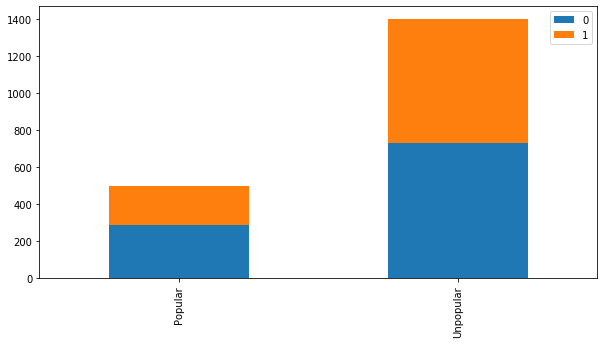

In [14]:
#bar chart for gender category
bar_chart('gender')

 We can see that male groups more popular than female

In [15]:
data.head(10)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,37.0,NaN,NaN,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,33.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,32.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,29.0,NaN,NaN,NaN,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,34.0,NaN,NaN,NaN,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,23.0,159.0,50.0,O,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,23.0,NaN,NaN,NaN,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,22.0,174.0,NaN,NaN,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,20.0,NaN,NaN,NaN,India,Main Vocalist,0,0


### Age

In [16]:
#fill NaN values to median of ages for each gender
data['age'].fillna(data.groupby('gender')["age"].transform("median"), inplace=True) 

In [17]:
data.loc[data['age']<=20,'age'] = 0,
data.loc[(data['age']>20)&(data['age']<=27),'age'] = 1,
data.loc[data['age']>27,'age'] = 2

In [18]:
#create bar chart for other categories
def bar_chart_1(dt):
    female = data[data['gender']==1][dt].value_counts()
    male = data[data['gender']==0][dt].value_counts()
    df = pd.DataFrame([female,male])
    df.index = ['Female','Male']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

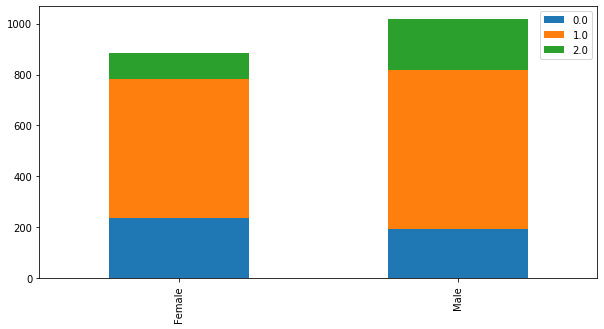

In [19]:
bar_chart_1('age')

### Height and weight

In [20]:
#fill missing age, height and weight for each gender
data['height'].fillna(data.groupby('gender')['height'].transform("median"), inplace=True)    
data['weight'].fillna(data.groupby('gender')['weight'].transform("median"), inplace=True)

In [21]:
data.loc[data['height']<=160,'height'] = 0,
data.loc[(data['height']>160)&(data['height']<=180),'height'] = 1,
data.loc[data['height']>180,'height'] = 2

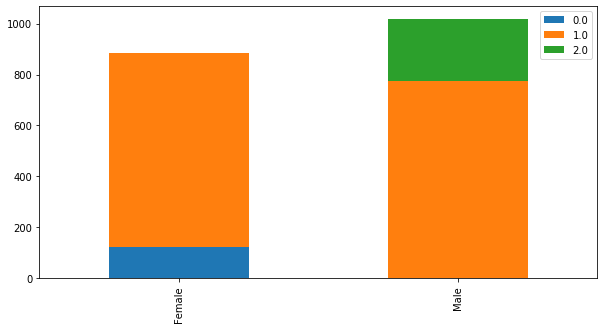

In [22]:
bar_chart_1('height')

In [23]:
data.loc[data['weight']<=50,'weight'] = 0,
data.loc[(data['weight']>50)&(data['weight']<=60),'weight'] = 1,
data.loc[data['weight']>60,'weight'] = 2

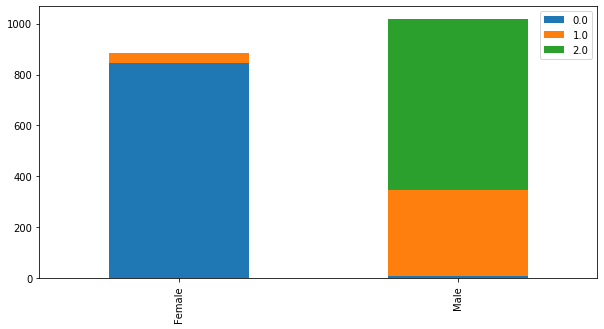

In [24]:
bar_chart_1('weight')

In [25]:
data.head(80)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,NaN,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,NaN,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,NaN,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,NaN,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,NaN,South Korea,"Vocalist, Maknae",1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
75,76,Doyoung,YG Entertainment,Magnum,0.0,1.0,1.0,B,South Korea,"Vocalist, Dancer, Maknae",0,0
76,77,Jeongwoo,YG Entertainment,Treasure13,0.0,1.0,1.0,O,South Korea,Vocalist,0,0
77,78,Hyunsuk,YG Entertainment,Treasure13,1.0,1.0,1.0,A,South Korea,"Leader, Rapper, Dancer",0,0
78,79,Jihoon,YG Entertainment,Treasure13,0.0,1.0,2.0,B,South Korea,"Dancer, Vocalist",0,0


### Blood type

In [26]:
#change values of Blood type column and fill NaN values for each gender
bloodtype_map = {"O": 1, "A": 2, "B": 3, "AB": 4}
data['blood type']= data['blood type'].map(bloodtype_map)
data['blood type'].fillna(data.groupby('gender')['blood type'].transform("median"), inplace=True)    

In [27]:
data.head(30)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,"Leader, Vocalist",1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,Vocalist,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,Vocalist,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,Vocalist,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,"Vocalist, Maknae",1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,Vocalist,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,1.0,0.0,0.0,1.0,Indonesia,"Lead Vocalist, Main Dancer, Lead Rapper",1,0
7,8,Roy,Zenith Media Contents,Z-Boys,1.0,1.0,2.0,2.0,Vietnam,Main Vocalist,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,1.0,1.0,2.0,2.0,Philippines,"Main Dancer, Lead Vocalist",0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,1.0,2.0,2.0,India,Main Vocalist,0,0


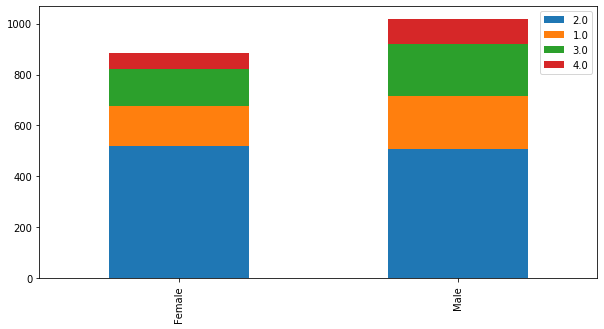

In [28]:
bar_chart_1('blood type')

### Position

In [29]:
#fill missing values of position 
data['position'] = data['position'].fillna("0")

#identify three main positions
for i, j in data.iterrows():
    d = data['position'][i]
    if "Vocalist" in d:
        data['position'][i] = "Vocalist" 
    elif "Rapper" in d:
        data['position'][i] = "Rapper" 
    else:
        data['position'][i] = "Other"

/Users/kamila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kamila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/kamila/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path wh

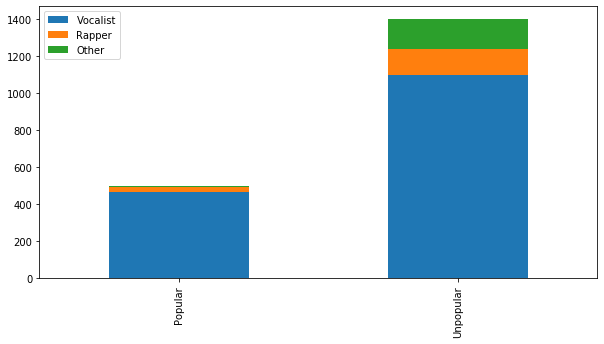

In [30]:
bar_chart('position')

Vocalists are the most popular

In [31]:
#change values of position column
position_map = {"Vocalist": 1, "Rapper": 2, "Other": 3}
data['position']= data['position'].map(position_map)

In [32]:
data.head(20)

,rank,name,agency,group,age,height,weight,blood type,country,position,gender,popularity
0,1,Jinah,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
1,2,Hayul,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
2,3,Jieun,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
3,4,Yunmi,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
4,5,Haum,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
5,6,Soyou,주식회사 씨그널엔터테인먼트그룹,Berry Chu,2.0,1.0,0.0,2.0,South Korea,1,1,0
6,7,Vanya,Zenith Media Contents,Z-Girls,1.0,0.0,0.0,1.0,Indonesia,1,1,0
7,8,Roy,Zenith Media Contents,Z-Boys,1.0,1.0,2.0,2.0,Vietnam,1,0,0
8,9,Josh,Zenith Media Contents,Z-Boys,1.0,1.0,2.0,2.0,Philippines,1,0,0
9,10,Sid,Zenith Media Contents,Z-Boys,0.0,1.0,2.0,2.0,India,1,0,0


### Country

In [33]:
#fill missing values of countries 
data["country"].fillna(method ='ffill', inplace = True) 

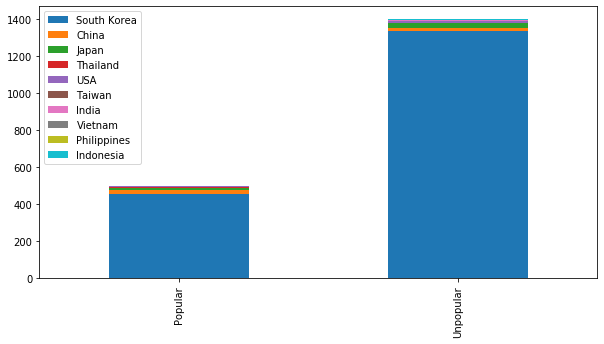

In [34]:
bar_chart('country')

Most popular idols from South Korea

In [35]:
country_map = {"South Korea": 0, "China": 0.4, "Taiwan": 0.8, "India": 1.2, "Japan": 1.6, "USA": 2, "Thailand": 2.4, "Vietnam": 2.8, "Indonesia": 3.2, "Philippines": 3.6}
data['country'] = data['country'].map(country_map)

In [36]:
#drop the columns because we dont need them
data.drop('agency',axis=1,inplace=True)
data.drop('name',axis=1,inplace=True)
data.drop('group',axis=1,inplace=True)
data.drop('rank',axis=1,inplace=True)

In [37]:
data.head(20)

,age,height,weight,blood type,country,position,gender,popularity
0,2.0,1.0,0.0,2.0,0.0,1,1,0
1,2.0,1.0,0.0,2.0,0.0,1,1,0
2,2.0,1.0,0.0,2.0,0.0,1,1,0
3,2.0,1.0,0.0,2.0,0.0,1,1,0
4,2.0,1.0,0.0,2.0,0.0,1,1,0
5,2.0,1.0,0.0,2.0,0.0,1,1,0
6,1.0,0.0,0.0,1.0,3.2,1,1,0
7,1.0,1.0,2.0,2.0,2.8,1,0,0
8,1.0,1.0,2.0,2.0,3.6,1,0,0
9,0.0,1.0,2.0,2.0,1.2,1,0,0


# 3. Feature Engineering